# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import jedi
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pandas_profiling
import pygments
import re
import seaborn as sns
from scipy import stats as st
from tqdm import tqdm
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [2]:
# Versions
print("jedi version:", jedi.__version__)
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("pandas profiling version:", pandas_profiling.__version__)
print("Pygments version:", pygments.__version__)
print("re version:", re.__version__)
print("Seaborn version:", sns.__version__)

jedi version: 0.15.1
numpy version: 1.17.2
pandas version: 0.25.1
pandas profiling version: 2.4.0
Pygments version: 2.4.2
re version: 2.2.1
Seaborn version: 0.9.0


In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [3]:
websites = pd.read_csv('../data/website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [4]:
# Your code here
#pandas_profiling.ProfileReport(websites)

In [5]:
websites.head()
websites.tail()
websites.info()
round(websites.describe(), 2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
URL                          1781 non-null object
URL_LENGTH                   1781 non-null int64
NUMBER_SPECIAL_CHARACTERS    1781 non-null int64
CHARSET                      1781 non-null object
SERVER                       1780 non-null object
CONTENT_LENGTH               969 non-null float64
WHOIS_COUNTRY                1781 non-null object
WHOIS_STATEPRO               1781 non-null object
WHOIS_REGDATE                1781 non-null object
WHOIS_UPDATED_DATE           1781 non-null object
TCP_CONVERSATION_EXCHANGE    1781 non-null int64
DIST_REMOTE_TCP_PORT         1781 non-null int64
REMOTE_IPS                   1781 non-null int64
APP_BYTES                    1781 non-null int64
SOURCE_APP_PACKETS           1781 non-null int64
REMOTE_APP_PACKETS           1781 non-null int64
SOURCE_APP_BYTES             1781 non-null int64
REMOTE_APP_BYTES             1781 non-null int64
APP

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
count,1781.00,1781.00,969.00,1781.00,1781.00,1781.00,1781.00,1781.00,1781.00,1781.00,1781.00,1781.00,1780.00,1781.00
mean,56.96,11.11,11726.93,16.26,5.47,3.06,2982.34,18.54,18.75,15892.55,3155.60,18.54,2.26,0.12
std,27.56,4.55,36391.81,40.50,21.81,3.39,56050.57,41.63,46.40,69861.93,56053.78,41.63,2.93,0.33
min,16.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,39.00,8.00,324.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,49.00,10.00,1853.00,7.00,0.00,2.00,672.00,8.00,9.00,579.00,735.00,8.00,0.00,0.00
75%,68.00,13.00,11323.00,22.00,5.00,5.00,2328.00,26.00,25.00,9806.00,2701.00,26.00,4.00,0.00
max,249.00,43.00,649263.00,1194.00,708.00,17.00,2362906.00,1198.00,1284.00,2060012.00,2362906.00,1198.00,20.00,1.00


In [6]:
# Your comment here
"""
1) What the dataset looks like?
>> What is it meant by this question?

2) What are the data types?
>> dtypes: float64(2), int64(12), object(7)

3) Which columns contain the features of the websites?
>> By features its meant..? 
>> — URL(?)
>> — CHARSET(?)

4.1) Which column contains the feature we will predict?
>> Type..?

4.2) What is the code standing for benign vs malicious websites?
>> No idea.

5.1) Do we need to transform any of the columns from categorical to ordinal values? 
>> Maybe..? I'd consider:
>> — WHOIS_COUNTRY
>> — WHOIS_STATEPRO
>> — WHOIS_REGDATE (either to ordinal or datetime or drop/ignore, depending on the intention)
>> — WHOIS_UPDATED_DATE (either to ordinal or datetime or drop/ignore, depending on the 
intention)

5.2) If so what are these columns?
See 5.1
"""

"\n1) What the dataset looks like?\n>> What is it meant by this question?\n\n2) What are the data types?\n>> dtypes: float64(2), int64(12), object(7)\n\n3) Which columns contain the features of the websites?\n>> By features its meant..? \n>> — URL(?)\n>> — CHARSET(?)\n\n4.1) Which column contains the feature we will predict?\n>> Type..?\n\n4.2) What is the code standing for benign vs malicious websites?\n>> No idea.\n\n5.1) Do we need to transform any of the columns from categorical to ordinal values? \n>> Maybe..? I'd consider:\n>> — WHOIS_COUNTRY\n>> — WHOIS_STATEPRO\n>> — WHOIS_REGDATE (either to ordinal or datetime or drop/ignore, depending on the intention)\n>> — WHOIS_UPDATED_DATE (either to ordinal or datetime or drop/ignore, depending on the \nintention)\n\n5.2) If so what are these columns?\nSee 5.1\n"

#### Next, evaluate if the columns in this dataset are strongly correlated.

In the Mushroom supervised learning lab we did recently, we mentioned we are concerned if our dataset has strongly correlated columns because if it is the case we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
URL_LENGTH,1.00,0.92,0.13,-0.04,-0.04,-0.05,-0.03,-0.04,-0.03,-0.01,-0.03,-0.04,-0.07,0.16
NUMBER_SPECIAL_CHARACTERS,0.92,1.00,0.21,-0.04,-0.04,-0.05,-0.02,-0.04,-0.03,-0.01,-0.02,-0.04,-0.05,0.28
CONTENT_LENGTH,0.13,0.21,1.00,0.08,-0.00,0.00,0.05,0.07,0.09,0.10,0.05,0.07,-0.05,-0.09
TCP_CONVERSATION_EXCHANGE,-0.04,-0.04,0.08,1.00,0.56,0.33,0.46,1.00,0.99,0.87,0.46,1.00,0.35,-0.04
DIST_REMOTE_TCP_PORT,-0.04,-0.04,-0.00,0.56,1.00,0.21,0.78,0.56,0.59,0.31,0.78,0.56,0.26,-0.08
REMOTE_IPS,-0.05,-0.05,0.00,0.33,0.21,1.00,0.02,0.36,0.30,0.17,0.03,0.36,0.55,-0.08
APP_BYTES,-0.03,-0.02,0.05,0.46,0.78,0.02,1.00,0.45,0.47,0.07,1.00,0.45,0.01,-0.01
SOURCE_APP_PACKETS,-0.04,-0.04,0.07,1.00,0.56,0.36,0.45,1.00,0.99,0.86,0.45,1.00,0.41,-0.03
REMOTE_APP_PACKETS,-0.03,-0.03,0.09,0.99,0.59,0.30,0.47,0.99,1.00,0.88,0.47,0.99,0.36,-0.03
SOURCE_APP_BYTES,-0.01,-0.01,0.10,0.87,0.31,0.17,0.07,0.86,0.88,1.00,0.08,0.86,0.22,-0.04


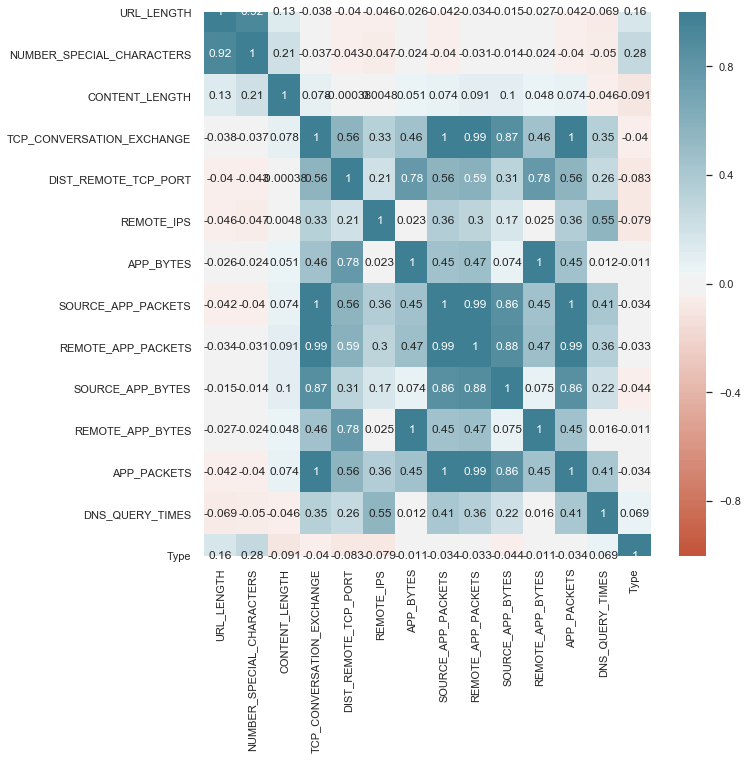

In [7]:
# Your code here
corr_matrix = websites.corr()

sns.set("notebook")
fig, ax = plt.subplots(figsize = (10, 10)) 
with sns.axes_style("white"):
    p2 = sns.heatmap(corr_matrix, square = False, fmt = '.2g', vmin = -1, vmax = 1, center = 0, 
                     cmap = sns.diverging_palette(20, 220, n = 200), annot = True)
round(corr_matrix, 2)

In [8]:
# Your comment here
"""
There are many columns with high collinearity. If the idea is to remove the columns with high 
collinearity among themselves, then those with be the ones (for instance, APP_PACKETS with 
REMOTE_APP_PACKETS). But I was thinking that the idea was to remove the ones with 
high collinearity WITH the target..? Which I was thinking that it was the Type, but Type has 
no high collinearity with any other column (unless 0.28 is already considered high 
collinearity? How is it defined for the purpose of this challenge?)
"""

'\nThere are many columns with high collinearity. If the idea is to remove the columns with high \ncollinearity among themselves, then those with be the ones (for instance, APP_PACKETS with \nREMOTE_APP_PACKETS). But I was thinking that the idea was to remove the ones with \nhigh collinearity WITH the target..? Which I was thinking that it was the Type, but Type has \nno high collinearity with any other column (unless 0.28 is already considered high \ncollinearity? How is it defined for the purpose of this challenge?)\n'

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

In [9]:
# Your code here
"""
With the above criteria we have:
URL_LENGHT <-> NUMBERS_SPECIAL_CHARS
TCP_CONV_XCHANGE <-> SOURCE_APP_PACKS
TCP_CONV_XCHANGE <-> REMOTE_APP_PACKS
TCP_CONV_XCHANGE <-> APP_PACKS
SOURCE_APP_PACKS <—> REMOTE_APP_PACKS
SOURCE_APP_PACKS <—> APP_PACKS
REMOTE_APP_PACKS <-> APP_PACKS
APP_BYTES <—> REMOTE_APP_BYTES
"""
removed_ws = websites.loc[:, websites.columns != "TCP_CONVERSATION_EXCHANGE"]

In [10]:
# Your comment here


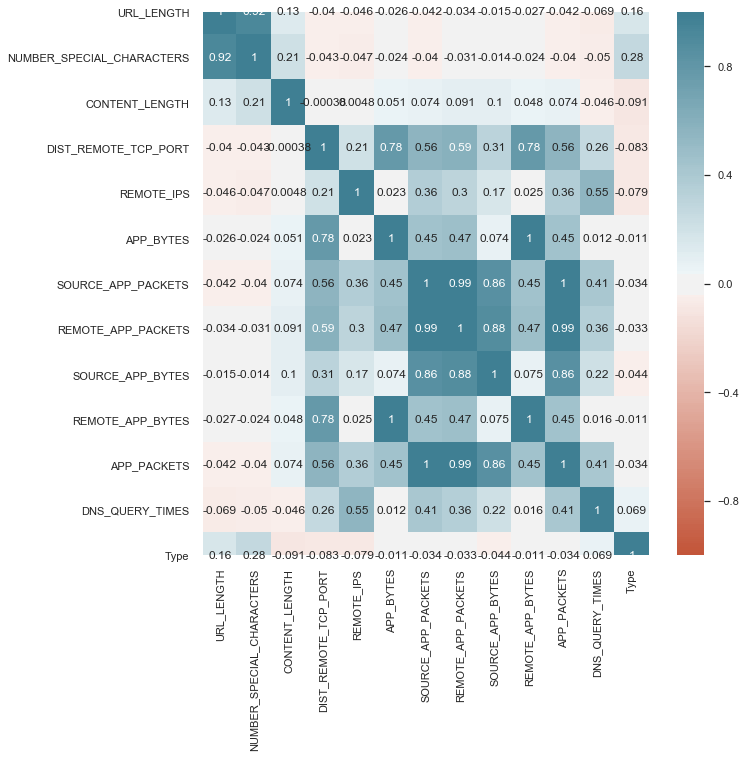

In [11]:
# Print heatmap again
corr_matrix = removed_ws.corr()

sns.set("notebook")
fig, ax = plt.subplots(figsize = (10, 10)) 
with sns.axes_style("white"):
    p2 = sns.heatmap(corr_matrix, square = False, fmt = '.2g', vmin = -1, vmax = 1, center = 0, 
                     cmap = sns.diverging_palette(20, 220, n = 200), annot = True)

In [12]:
# There are still quite a few, so I'll continue
removed_ws = removed_ws.loc[:, removed_ws.columns != "REMOTE_APP_BYTES"]

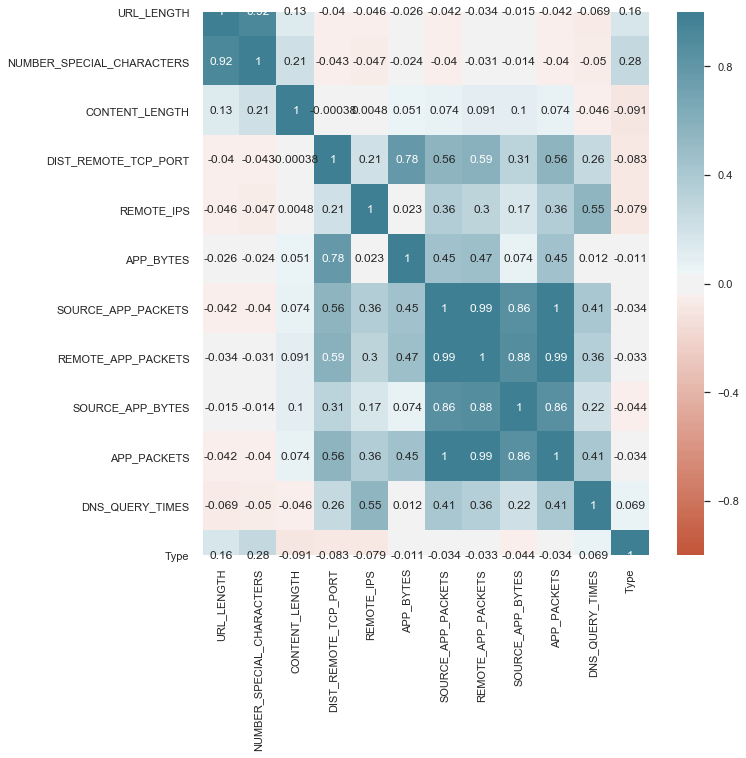

In [13]:
# Print heatmap again
corr_matrix = removed_ws.corr()

sns.set("notebook")
fig, ax = plt.subplots(figsize = (10, 10)) 
with sns.axes_style("white"):
    p2 = sns.heatmap(corr_matrix, square = False, fmt = '.2g', vmin = -1, vmax = 1, center = 0, 
                     cmap = sns.diverging_palette(20, 220, n = 200), annot = True)

In [14]:
# There are still a couple, so I'll continue
removed_ws = removed_ws.loc[:, removed_ws.columns != "SOURCE_APP_PACKETS"]

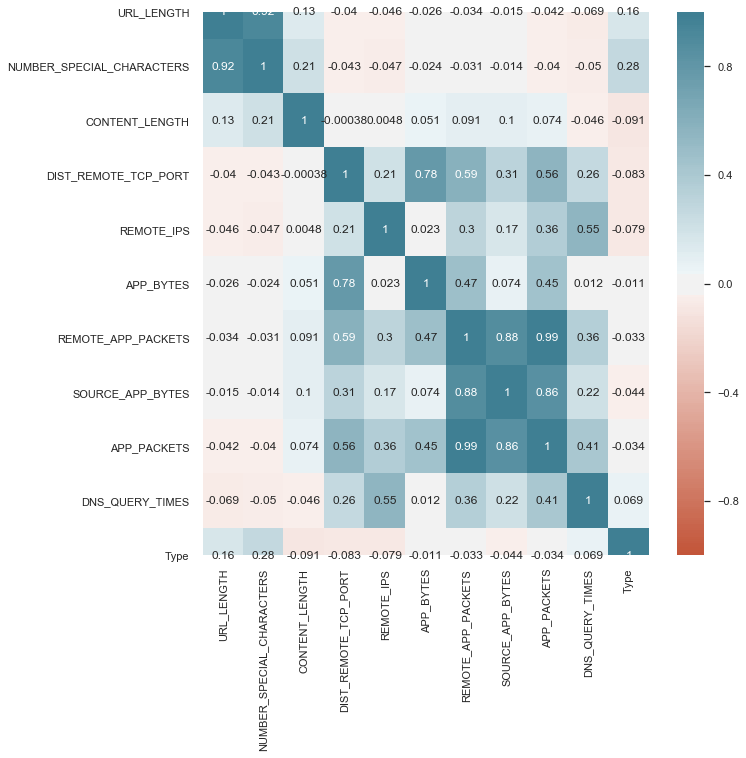

In [15]:
# Print heatmap again
corr_matrix = removed_ws.corr()

sns.set("notebook")
fig, ax = plt.subplots(figsize = (10, 10)) 
with sns.axes_style("white"):
    p2 = sns.heatmap(corr_matrix, square = False, fmt = '.2g', vmin = -1, vmax = 1, center = 0, 
                     cmap = sns.diverging_palette(20, 220, n = 200), annot = True)

In [16]:
# Still...
removed_ws = removed_ws.loc[:, removed_ws.columns != "REMOTE_APP_PACKETS"]

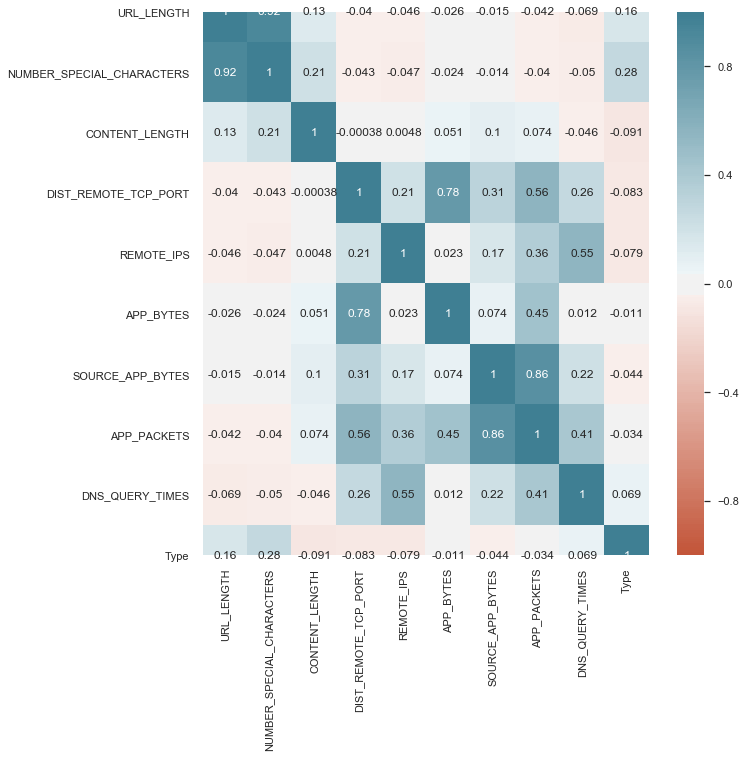

In [17]:
# Print heatmap again
corr_matrix = removed_ws.corr()

sns.set("notebook")
fig, ax = plt.subplots(figsize = (10, 10)) 
with sns.axes_style("white"):
    p2 = sns.heatmap(corr_matrix, square = False, fmt = '.2g', vmin = -1, vmax = 1, center = 0, 
                     cmap = sns.diverging_palette(20, 220, n = 200), annot = True)

In [18]:
# Just URL_LENGHT with NUMBERS_SPECIAL_CHARS missing 
removed_ws = removed_ws.loc[:, removed_ws.columns != "URL_LENGTH"]

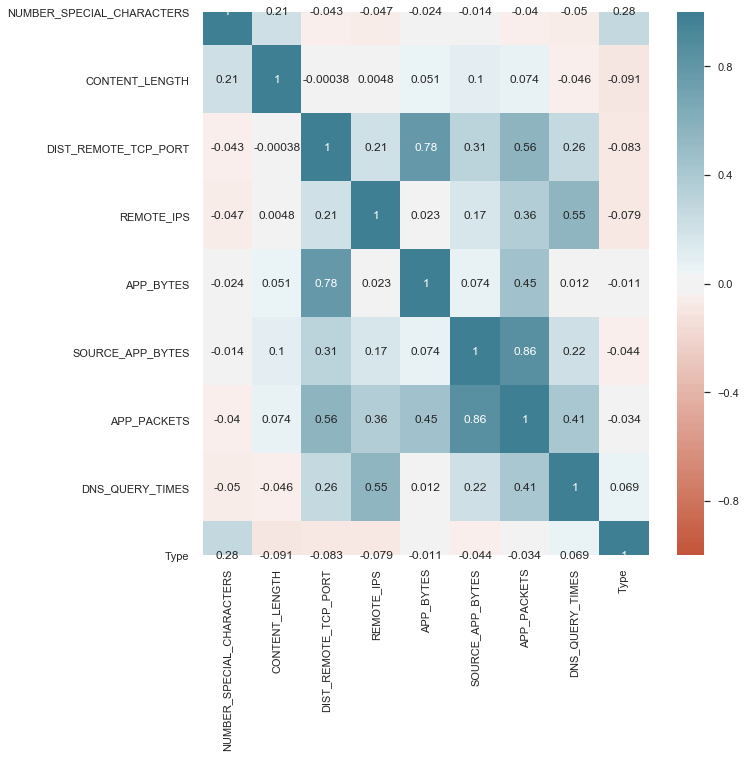

In [19]:
# Print heatmap again
corr_matrix = removed_ws.corr()

sns.set("notebook")
fig, ax = plt.subplots(figsize = (10, 10)) 
with sns.axes_style("white"):
    p2 = sns.heatmap(corr_matrix, square = False, fmt = '.2g', vmin = -1, vmax = 1, center = 0, 
                     cmap = sns.diverging_palette(20, 220, n = 200), annot = True)

In [20]:
"""
Now there's none above .90
"""

"\nNow there's none above .90\n"

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [21]:
# Your code here
# different ways to check the abs and % of nulls in a df/series
print("Abs by Column:\n", removed_ws.isna().sum())
print("\n% by Column:\n", removed_ws.isna().mean().round(4) * 100)
print("\n% by Total(..?):", round((removed_ws.isnull().any(axis = 1).sum() / len(removed_ws)) 
                                * 100, 2))

Abs by Column:
 URL                            0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        0
SERVER                         1
CONTENT_LENGTH               812
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
WHOIS_REGDATE                  0
WHOIS_UPDATED_DATE             0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

% by Column:
 URL                           0.00
NUMBER_SPECIAL_CHARACTERS     0.00
CHARSET                       0.00
SERVER                        0.06
CONTENT_LENGTH               45.59
WHOIS_COUNTRY                 0.00
WHOIS_STATEPRO                0.00
WHOIS_REGDATE                 0.00
WHOIS_UPDATED_DATE            0.00
DIST_REMOTE_TCP_PORT          0.00
REMOTE_IPS                    0.00
APP_BYTES                     0.00
SOURCE_A

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [22]:
# Your code here
# looking a little at the data first
removed_ws[removed_ws["SERVER"].isnull()]
removed_ws[removed_ws["DNS_QUERY_TIMES"].isnull()]
removed_ws[removed_ws["CONTENT_LENGTH"].isnull()]

removed_ws["SERVER"].value_counts()
removed_ws["DNS_QUERY_TIMES"].value_counts()
removed_ws["CONTENT_LENGTH"].value_counts()

removed_ws["DNS_QUERY_TIMES"].mean()
removed_ws["CONTENT_LENGTH"].mean()

removed_ws["DNS_QUERY_TIMES"].mode()
removed_ws["CONTENT_LENGTH"].mode()

# dropping the the "CONTENT_LENGTH" column, and the rows in SERVER and DNS_QUERY_TIMES
removed_ws.drop("CONTENT_LENGTH", axis = 1, inplace = True)

In [23]:
removed_ws.dropna(inplace = True)
removed_ws.dropna(inplace = True)
removed_ws

,URL,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,7,iso-8859-1,nginx,None,None,10/10/2015 18:21,None,0,2,700,1153,9,2.0,1
1,B0_2314,6,UTF-8,Apache/2.4.10,None,None,None,None,7,4,1230,1265,17,0.0,0
2,B0_911,6,us-ascii,Microsoft-HTTPAPI/2.0,None,None,None,None,0,0,0,0,0,0.0,0
3,B0_113,6,ISO-8859-1,nginx,US,AK,7/10/1997 4:00,12/09/2013 0:45,22,3,3812,18784,39,8.0,0
4,B0_403,6,UTF-8,None,US,TX,12/05/1996 0:00,11/04/2017 0:00,2,5,4278,129889,61,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,M4_48,16,UTF-8,Apache,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,0,0,0,186,0,0.0,1
1777,M4_41,17,UTF-8,Apache,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,0,0,0,124,0,0.0,1
1778,B0_162,34,utf-8,Apache/2.2.16 (Debian),US,FL,15/02/1999 0:00,15/07/2015 0:00,2,6,6631,132181,87,4.0,0
1779,B0_1152,34,ISO-8859-1,cloudflare-nginx,US,CA,1/04/1998 0:00,9/12/2016 0:00,0,0,0,0,0,0.0,0


In [24]:
# different ways to check the abs and % of nulls in a df/series
print("Abs by Column:\n", removed_ws.isna().sum())
print("\n% by Column:\n", removed_ws.isna().mean().round(4) * 100)
print("\n% by Total(..?):", round((removed_ws.isnull().any(axis = 1).sum() / len(removed_ws)) 
                                * 100, 2))

Abs by Column:
 URL                          0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64

% by Column:
 URL                          0.0
NUMBER_SPECIAL_CHARACTERS    0.0
CHARSET                      0.0
SERVER                       0.0
WHOIS_COUNTRY                0.0
WHOIS_STATEPRO               0.0
WHOIS_REGDATE                0.0
WHOIS_UPDATED_DATE           0.0
DIST_REMOTE_TCP_PORT         0.0
REMOTE_IPS                   0.0
APP_BYTES                    0.0
SOURCE_APP_BYTES             0.0
APP_PACKETS                  0.0
DNS_QUERY_TIMES              0.0
Type                         

In [25]:
# Your comment here
"""
I droped because it was asked in this challenge. I prefer to change the values and map those
changes into another column, as I mentioned in another lab.
"""

'\nI droped because it was asked in this challenge. I prefer to change the values and map those\nchanges into another column, as I mentioned in another lab.\n'

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [26]:
# Examine missing values in each column
print("Abs by Column:\n", removed_ws.isna().sum())
print("\n% by Column:\n", removed_ws.isna().mean().round(4) * 100)
print("\n% by Total(..?):", round((removed_ws.isnull().any(axis = 1).sum() / len(removed_ws)) 
                                * 100, 2))

Abs by Column:
 URL                          0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64

% by Column:
 URL                          0.0
NUMBER_SPECIAL_CHARACTERS    0.0
CHARSET                      0.0
SERVER                       0.0
WHOIS_COUNTRY                0.0
WHOIS_STATEPRO               0.0
WHOIS_REGDATE                0.0
WHOIS_UPDATED_DATE           0.0
DIST_REMOTE_TCP_PORT         0.0
REMOTE_IPS                   0.0
APP_BYTES                    0.0
SOURCE_APP_BYTES             0.0
APP_PACKETS                  0.0
DNS_QUERY_TIMES              0.0
Type                         

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [27]:
# Your code here
removed_ws["WHOIS_COUNTRY"].unique()

# creating a dictionary for the consolidation (why not 'ru' to 'RU'? Shouldn't 'UK' and 'GB' 
# also be changed?) -> After re-reading, I'll also change these.
countries = {"Cyprus": "CY", 
            "us": "US", 
            "se": "SE", 
            "United Kingdom": "GB", 
            "[u'GB'; u'UK']": "GB",
            "ru": "RU",
            "UK": "GB"}

# consolidation
removed_ws["WHOIS_COUNTRY"].replace(countries, inplace = True)
removed_ws["WHOIS_COUNTRY"].unique()

array(['None', 'US', 'SC', 'GB', 'RU', 'AU', 'CA', 'PA', 'SE', 'IN', 'LU',
       'TH', 'FR', 'NL', 'UG', 'JP', 'CN', 'SI', 'IL', 'KY', 'AT', 'CZ',
       'PH', 'BE', 'NO', 'TR', 'LV', 'DE', 'ES', 'BR', 'KR', 'HK', 'UA',
       'CH', 'BS', 'PK', 'IT', 'CY', 'BY', 'AE', 'IE', 'UY', 'KG'],
      dtype=object)

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

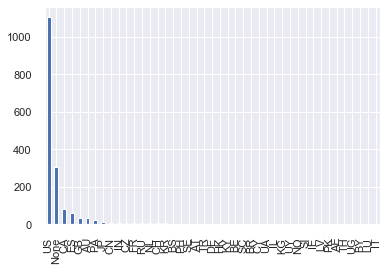

In [28]:
# Your code here
removed_ws["WHOIS_COUNTRY"].value_counts().plot.bar()


#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [29]:
# Your code here
"""
I think it was meant: "After verifying, now let's keep the top 10 values of the column and 
re-label other *values* with OTHER". (and not *column*)
"""
# setting the values to transform into "OTHER"
remove = removed_ws["WHOIS_COUNTRY"].value_counts()[:10].index.tolist()

# passing those values
removed_ws["WHOIS_COUNTRY"].where(websites["WHOIS_COUNTRY"].isin(remove), "OTHER", 
                                  inplace = True)

# checking
removed_ws["WHOIS_COUNTRY"].unique()

array(['None', 'US', 'OTHER', 'GB', 'AU', 'CA', 'PA', 'IN', 'JP', 'CN',
       'ES'], dtype=object)

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [30]:
# Your code here
removed_ws.drop(["WHOIS_STATEPRO", "WHOIS_REGDATE", "WHOIS_UPDATED_DATE"], axis = 1, 
                inplace = True)

removed_ws.columns

Index(['URL', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'WHOIS_COUNTRY', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES',
       'SOURCE_APP_BYTES', 'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')

# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [31]:
# Your code here
removed_ws.dtypes

URL                           object
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
WHOIS_COUNTRY                 object
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [32]:
# Your code here
removed_ws.drop("URL", axis = 1, inplace = True)

removed_ws.columns

Index(['NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER', 'WHOIS_COUNTRY',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [33]:
# Your code here
removed_ws["CHARSET"].unique()

array(['iso-8859-1', 'UTF-8', 'us-ascii', 'ISO-8859-1', 'utf-8', 'None',
       'windows-1251', 'ISO-8859', 'windows-1252'], dtype=object)

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [34]:
# Your code here
removed_ws["SERVER"].unique()

array(['nginx', 'Apache/2.4.10', 'Microsoft-HTTPAPI/2.0', 'None',
       'Apache/2', 'nginx/1.10.1', 'Apache', 'Apache/2.2.15 (Red Hat)',
       'Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'openresty/1.11.2.1', 'Apache/2.2.22', 'Apache/2.4.7 (Ubuntu)',
       'nginx/1.12.0',
       'Apache/2.4.12 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'Oracle-iPlanet-Web-Server/7.0', 'cloudflare-nginx', 'nginx/1.6.2',
       'openresty', 'Heptu web server', 'Pepyaka/1.11.3', 'nginx/1.8.0',
       'nginx/1.10.1 + Phusion Passenger 5.0.30',
       'Apache/2.2.29 (Amazon)', 'Microsoft-IIS/7.5', 'LiteSpeed',
       'Apache/2.4.25 (cPanel) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'tsa_c', 'Apache/2.2.0 (Fedora)', 'Apache/2.2.22 (Debian)',
       'Apache/2.2.15 (CentOS)', 'Apache/2.4.25',
       'Apache/2.4.25 (Amazon) PHP/7.0.14', 'GSE',
       'Apache/2.4.23 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4',
       'Apache/2.4.25 (Amazon) OpenSSL/1.0.1k-fips'

![Think Hard](../images/think-hard.jpg)

In [35]:
# Your comment here
"""
I thought it can be dealt with in many ways. I think I'd create a regex that slits the 
column in 4: one would have values  like 'apache', other the version (like '2.4.18'), the 
other the operation system (like 'Unbutu'), and the fourth would be for other values. Then I'd 
recheck the unique values in each, probably drop the verion column, use the other to fill some
of the values in the os and/or the column that would have the server stucture and drop the 
other column.
"""

"\nI thought it can be dealt with in many ways. I think I'd create a regex that slits the \ncolumn in 4: one would have values  like 'apache', other the version (like '2.4.18'), the \nother the operation system (like 'Unbutu'), and the fourth would be for other values. Then I'd \nrecheck the unique values in each, probably drop the verion column, use the other to fill some\nof the values in the os and/or the column that would have the server stucture and drop the \nother column.\n"

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [36]:
# Your code here
servers = ["Microsoft", "Apache", "nginx"]

for server in servers:
    removed_ws.loc[removed_ws["SERVER"].str.casefold().str.contains(server.casefold()), 
                   "SERVER"] = server
    
removed_ws["SERVER"] = np.where(removed_ws["SERVER"].isin(servers), removed_ws["SERVER"], 
                              "other")

removed_ws["SERVER"].unique()

array(['nginx', 'Apache', 'Microsoft', 'other'], dtype=object)

In [37]:
# Count `SERVER` value counts here
removed_ws["SERVER"].value_counts()

Apache       642
other        503
nginx        436
Microsoft    198
Name: SERVER, dtype: int64

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)).** Make sure you drop the categorical columns by passing `drop_first=True` to `get_dummies` as we don't need them any more. **Also, assign the data with dummy values to a new variable `website_dummy`.**

In [43]:
# Your code here
website_dummy = pd.get_dummies(removed_ws, drop_first = True)

Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [44]:
# Your code here
website_dummy.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('uint8')], dtype=object)

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [45]:
from sklearn.model_selection import train_test_split

# Your code here:
X = website_dummy.drop(labels = "Type", axis = 1)
y = website_dummy["Type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [46]:
# Your code here:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [48]:
# Your code here:
X_train.isna().sum()
X_test.isna().sum()

lr.fit(X_train, y_train)

acc = lr.score(X_test, y_test) * 100 # # correct answers / # total rows

print(f"Logistic Regression Test Accuracy {round(acc, 2)}%")
print(f"Predict: {lr.predict(X_test[: 1])}")
print(f"Test: {y_test[: 1]}")

Logistic Regression Test Accuracy 91.29%
Predict: [0]
Test: 1478    0
Name: Type, dtype: int64


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [53]:
# Your code here:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_pred = lr.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
pre = tp / (tp + fp)
print(f"Accuracy score: {pre}")
confusion_matrix(y_test, y_pred)

Accuracy score: 0.7105263157894737


array([[298,  11],
       [ 20,  27]])

What are your thoughts on the performance of the model? Write your conclusions below.

In [54]:
# Your conclusions here:
"""
The previous model showed better results in this run of accuracy tests. Don't quite know how
to interpret the rest of the results.
"""

'\nThe previous model showed better results in this run of accuracy tests.\n'

#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [56]:
# Your code here:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)  # n_neighbors means k
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

acc = knn.score(X_test, y_test) * 100

To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [57]:
# Your code here:
print(f"2 neighbors KNN Score: {round(acc, 2)}%")

print(f"confusion matrix: {confusion_matrix(y_test, y_pred)}")

2 neighbors KNN Score: 92.98%
confusion matrix: [[298  11]
 [ 14  33]]


#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [58]:
# Your code here:
knn = KNeighborsClassifier(n_neighbors = 5)  # n_neighbors means k
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

acc = knn.score(X_test, y_test) * 100

print(f"2 neighbors KNN Score: {round(acc, 2)}%")

print(f"confusion matrix: {confusion_matrix(y_test, y_pred)}")

2 neighbors KNN Score: 92.98%
confusion matrix: [[300   9]
 [ 16  31]]


Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [ ]:
# Your conclusions here:
"""
The accuracy score remained the same, but I'm unsure if there isn't a random factor that 
affects that. As for the confusion matrix, I don't know how to read it.
"""


# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [ ]:
# Your code here